<a href="https://colab.research.google.com/github/arnml/colabrepository/blob/main/MITx_6_419x_module1_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema 1.2

In [ ]:
%reset -f
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/mitx/module1_data/gamma-ray.csv')
df.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,seconds,count
count,100.000000,100.000000
mean,157.182000,0.610000
std,251.579574,1.246368
min,12.500000,0.000000
25%,52.250000,0.000000
50%,100.350000,0.000000
75%,110.250000,1.000000
max,1350.000000,7.000000


In [ ]:
lambda_null = df['count'].mean() / df['seconds'].mean()
lambda_null

0.003880851496990749

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
df_chi2 = 99
critical_value = chi2.ppf(0.95, df_chi2)
print("Critical value:", critical_value)

Critical value: 123.2252214533618


In [ ]:
from scipy.stats import poisson
statistic_num = np.prod(poisson.pmf(df['count'], lambda_null * df['seconds']))
statistic_den = np.prod(poisson.pmf(df['count'], df['count']))
statistic = -2*np.log(statistic_num / statistic_den)
p_value = chi2.sf(statistic, df_chi2)
print('statistic:', statistic)
print('p_value:', p_value)

statistic: 104.39792133021314
p_value: 0.33576662402509894


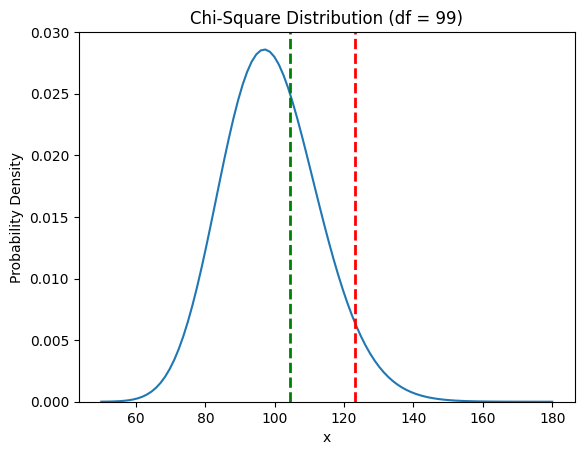

In [ ]:
x = np.linspace(50, 180, 100)
y = chi2.pdf(x, df_chi2)

plt.plot(x, y)
plt.axvline(critical_value, color='red', linestyle='dashed', linewidth=2)
plt.axvline(statistic, color='green', linestyle='dashed', linewidth=2)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.ylim(0, 0.03)
plt.title('Chi-Square Distribution (df = {})'.format(df_chi2))
plt.show()


# Problema 1.4

In [84]:
%reset -f
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import numpy as np
def openData(path):
   data = np.genfromtxt(path, delimiter=',', skip_header=1)[:, 1:]
   np_arrays = np.array([np.array(row) for row in data])
   return np_arrays
golub_data = openData('/content/drive/MyDrive/mitx/module1_data/golub.csv')
golub_classnames = openData('/content/drive/MyDrive/mitx/module1_data/golub_cl.csv')

In [86]:
N_ALL = len(golub_classnames[golub_classnames == 0])
N_AML = len(golub_classnames[golub_classnames == 1])
x_ALL = golub_data[:,golub_classnames[:,0] == 0]
x_AML = golub_data[:,golub_classnames[:,0] == 1]
mean_x_ALL = np.mean(x_ALL, axis=1)
variance_x_ALL = np.var(x_ALL, axis=1, ddof=1)
mean_x_AML = np.mean(x_AML, axis=1)
variance_x_AML = np.var(x_AML, axis=1, ddof=1)

In [87]:
# statistics
t_Welch = (mean_x_ALL - mean_x_AML) / np.sqrt((variance_x_ALL / len(x_ALL[0])) + (variance_x_AML / len(x_AML[0])))

In [88]:
# t-distribution order
v = (variance_x_ALL / N_ALL + variance_x_AML / N_AML) ** 2 / ((variance_x_ALL / N_ALL) ** 2 / (N_ALL - 1) + (variance_x_AML / N_AML) ** 2 / (N_AML - 1))

In [89]:
from scipy.stats import t
alpha = 0.05
p_values = t.sf(np.abs(t_Welch), df = v)
sorted_p_values = np.sort(p_values)
m = len(sorted_p_values)

In [90]:
# uncorrected experiments
np.sum(sorted_p_values < alpha / 2)

1078

In [96]:
# Holm-Bonferroni correction
holm_bonferroni_values = sorted_p_values * np.arange(m, 0, -1)
holm_bonferroni_rejected_number = np.sum(holm_bonferroni_values < alpha / 2)
holm_bonferroni_rejected_number

103

In [97]:
# Benjamini-Hochberg correction
benjamini_hochberg_values = sorted_p_values * m /np.arange(1, m + 1)
max_index = np.max(np.where(benjamini_hochberg_values < alpha / 2))
benjamini_hochberg_rejected_number = max_index + 1
benjamini_hochberg_rejected_number

695

# Problema 1.6 - part 1